In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import warnings
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
warnings.simplefilter(action = "ignore", category = FutureWarning)

%matplotlib inline

df = pd.read_csv('data/training.csv', index_col = 'id')


df.corr()
df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


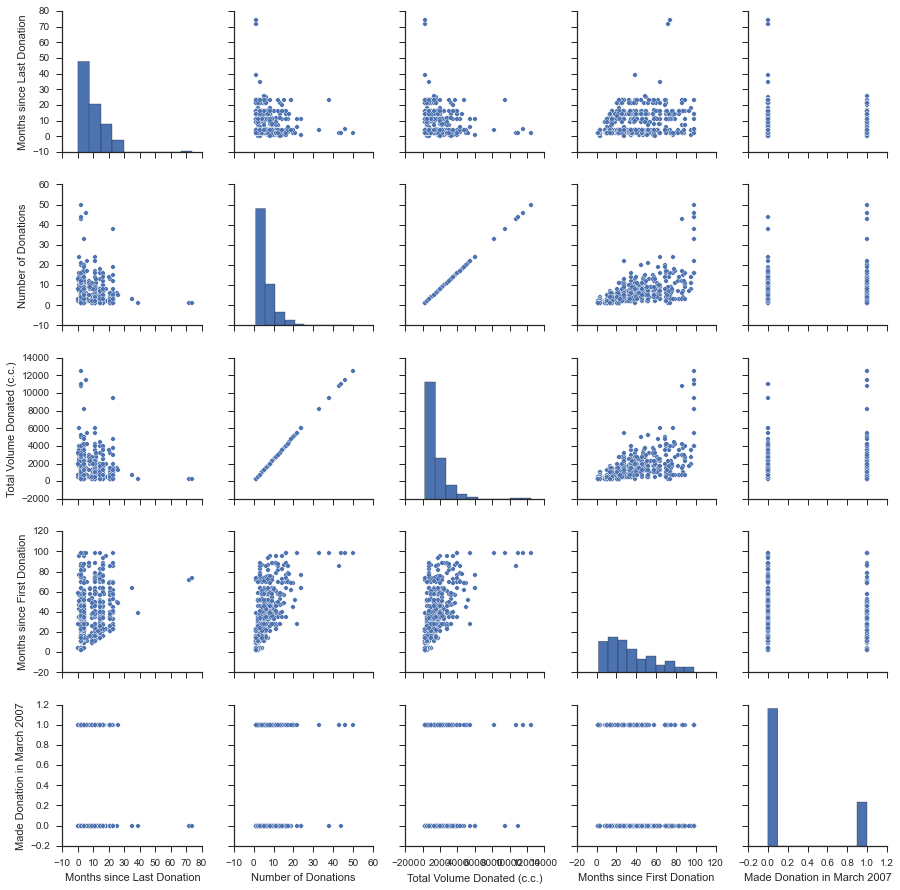

In [6]:
sns.pairplot(df)

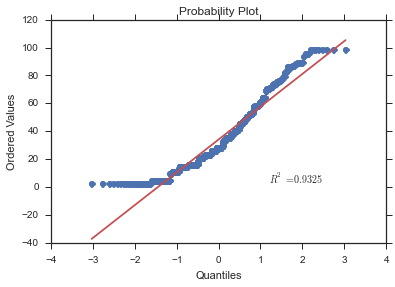

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [12]:
import scipy.stats as stats
import pylab 
(a, r) = stats.probplot(df['Months since First Donation'], dist="norm", plot=pylab)
pylab.show()
df.columns

Lambda = -0.0559441680736
Lambda = 0.430901691756
p values
Intercept    9.348312e-12
number       7.222717e-10
first        3.059927e-05
last         3.485880e-02
dtype: float64

0.131001629135
0.126443945372

                            OLS Regression Results                            
Dep. Variable:                donated   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     28.74
Date:                Mon, 04 Jul 2016   Prob (F-statistic):           2.54e-17
Time:                        08:12:27   Log-Likelihood:                -286.48
No. Observations:                 576   AIC:                             581.0
Df Residuals:                     572   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


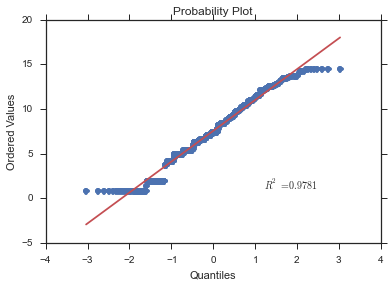

In [28]:
import statsmodels.formula.api as smf

df = pd.read_csv('data/training.csv', index_col = 'id')
df.columns= ['last','number','volume','first','donated']

# ---
from scipy import stats

boxcox_samples = stats.boxcox(df.number.values)[0]
lambdaa = stats.boxcox(df.number.values)[1]
print("Lambda = %s"% lambdaa)
df['number'] = boxcox_samples

boxcox_samples = stats.boxcox(df['first'].values)[0]
lambdaa = stats.boxcox(df['first'].values)[1]
print("Lambda = %s"% lambdaa)
df['first'] = boxcox_samples


lm = smf.ols(formula='donated ~ number + first + last', data=df).fit()

# print(lm.summary())
print("p values")

print(lm.pvalues)
print("")
print(lm.rsquared)
print(lm.rsquared_adj)
print("")
print(lm.summary())

import scipy.stats as stats
import pylab 
(a, r) = stats.probplot(df['first'], dist="norm", plot=pylab)
pylab.show()



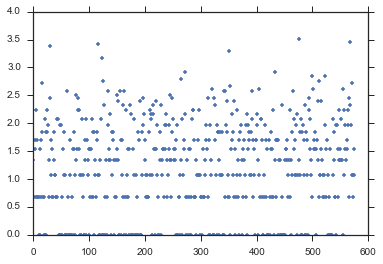

In [38]:
plt.plot(df['number'],'.')